# Applied Data Science Capstone Project
### Ambarish Ambuj

## Introduction

The severity code of the accident is typically set such that it represents the extent of damage caused by the accident. In an environment of limited resources, focusing more resources on preventing high severity accidents is one of the solutions to minimize the amount of damage with given resources. However, to do that, an understanding of the factors that affect the severity of the accident and the extent to which they affect the severity, is essential. Hence, with the given data about accident severity and some related parameters, this project tries to come up with a model to predict the impact of some key parameters such as accident location type, collission type, weather condition, road condition, lighting condition, number of persons involved in the collision etc. on the severity of the accident. The output of this model can provide policy inputs to the government to take specific actions to mitigate the causes that impact the accident severity the most.

## Data Description

The base data is taken from the example dataset provided in the course at the link https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
 We will first import the data as a dataframe to get a glimpse of the data.

Importing the necessary python libraries for the project

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


Importing the data from csv file

In [2]:
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Let us check the size of the file, the column names and some sample data to get basic understanding of the data.

In [3]:
df.shape

(194673, 38)

In [4]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [5]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


So, there are 194673 observations of incidents. There are 38 columns in the original dataset but as is evident from a preview of first 5 rows of the data, a column called 'SeverityCode' is repeated. So, there are 37 attributes for  194673 incidents. However, going back to our problem definition, not all 37 attributes are of our interest. We are only interested in exploring the impact of certain mitigable attributes on severity of the accident. So, based on the primary theoretical understanding, we select 'SEVERITYCODE' as the dependent variable and following variables as dependent variable:  
1. 'ADDRTYPE': A catagorical variable representing the type of location where incident took place. It may take the values of 'Intersection', 'Block' etc.  
2. 'COLLISIONTYPE': A categorical variable indicating the type of collision such as head-on, angle etc.
3. 'PERSONCOUNT': An integer representing number of persons involved in the collision.
4. 'PEDCOUNT': An integer representing number of pedestrians involved in the collision.
5. 'PEDCYLCOUNT': An integer representing the number of bicycles involved in the collision.
6. 'VEHCOUNT': An integer representing the number of vehicles involved in the collision.
7. 'WEATHER': A categorical variable describing whether the weather was cloudy or rainy etc. at the time of collision
8. 'ROADCOND': A categorical variable describing condition of the road i.e. dry or wet
9. 'LIGHTCOND': A categorical variable describing the lighting condition at the time of collision.

So, let's extract the one target and 9 predictor variables from the dataframe and store it in a new dataframe.

In [6]:
df1 = df[["SEVERITYCODE", "ADDRTYPE", "COLLISIONTYPE", "PERSONCOUNT", "PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT","WEATHER", "ROADCOND", "LIGHTCOND"]]
df1.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,Angles,2,0,0,2,Overcast,Wet,Daylight
1,1,Block,Sideswipe,2,0,0,2,Raining,Wet,Dark - Street Lights On
2,1,Block,Parked Car,4,0,0,3,Overcast,Dry,Daylight
3,1,Block,Other,3,0,0,3,Clear,Dry,Daylight
4,2,Intersection,Angles,2,0,0,2,Raining,Wet,Daylight


As we have a large number of data available with us, the best treatment of missing values is to drop them so that we don't have to guess the missing values and thereby affect the output. So, we will drop any rows with missing values.

In [7]:
df2 = df1.dropna(axis=0)
df2.shape

(187504, 10)

So, some of the rows were dropped and now we have 187504 observations with us to train, validate and test the model.  

## Exploratory Data Analysis

We will first explore the data and try to observe some patterns within the data which may further help in our analysis exercise.

In [8]:
df2['SEVERITYCODE'].value_counts()

1    130634
2     56870
Name: SEVERITYCODE, dtype: int64

[]

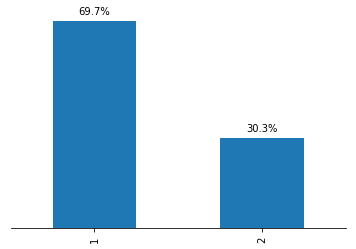

In [9]:
ax = df2['SEVERITYCODE'].value_counts().plot(kind = 'bar')
def add_value_labels(ax, spacing=5, fontsize = 14):

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        label = "{:.1%}".format(y_value/187504)
        ax.annotate(label, (x_value, y_value), xytext = (0, spacing), textcoords = "offset points", ha = 'center', va='bottom')

add_value_labels(ax)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_yaxis().set_ticks([])

As is evident from the bar chart, 69.7% of all accidents have been of severity 1 i.e. only property damage whereas remaining 30.3% accidents resulted in some human injury as well.   
This is on expected lines as we expect more accidents of less severity.

Let us now analyze some of the explanatory variables considered in isolation.

In [10]:
df2['ADDRTYPE'].value_counts()

Block           123315
Intersection     63447
Alley              742
Name: ADDRTYPE, dtype: int64

[]

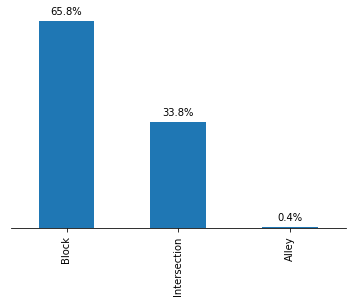

In [11]:
ax2 = df2['ADDRTYPE'].value_counts().plot(kind='bar')
def add_value_labels(ax2, spacing=5, fontsize = 14):

    for rect in ax2.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        label = "{:.1%}".format(y_value/187504)
        ax2.annotate(label, (x_value, y_value), xytext = (0, spacing), textcoords = "offset points", ha = 'center', va='bottom')

add_value_labels(ax2)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.get_yaxis().set_ticks([])

It indicates that about two third of all accidents took place in blocks whereas about one third took place at intersections. Alleys, understandably, contributed negligible proportion of accidents.

In [12]:
df2['COLLISIONTYPE'].value_counts()

Parked Car    46679
Angles        34555
Rear Ended    33794
Other         23440
Sideswipe     18442
Left Turn     13659
Pedestrian     6589
Cycles         5399
Right Turn     2936
Head On        2011
Name: COLLISIONTYPE, dtype: int64

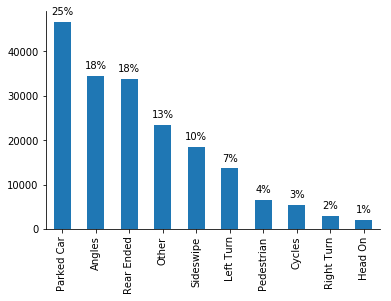

In [13]:
ax3 = df2['COLLISIONTYPE'].value_counts().plot(kind='bar')
def add_value_labels(ax3, spacing=5, fontsize = 14):

    for rect in ax3.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        label = "{:.0%}".format(y_value/187504)
        ax3.annotate(label, (x_value, y_value), xytext = (0, spacing), textcoords = "offset points", ha = 'center', va='bottom')

add_value_labels(ax3)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

This bar chart provides some very interesting insights. It indicates that about a quarter of all accidents involved a parked car. It is likely that these incidents are mostly happening in blocks rather than intersection. This may be one plausible reason why blocks have more accidents than intersections.  
This also provides an interesting policy question to address and regulate the parking in blocks to avoid these accidents.  
'Angles', 'Rear Ended' and 'Sideswipe' are other prominent types of accidents.   
Fortunately, the number of accidents with 'Head On' collision is low.

Looking at the accident location and collision type in isolation itself has given us significant insights. However, looking at them together may provide us further insights. So, we create a pivot table and a heatmap to understand it better.

In [14]:
df2group = df2[['SEVERITYCODE','ADDRTYPE','COLLISIONTYPE']].groupby(['ADDRTYPE','COLLISIONTYPE'], as_index = False).count()

In [15]:
df2_pivot = df2group.pivot(index='ADDRTYPE', columns = 'COLLISIONTYPE')
df2_pivot

SEVERITYCODE                                                \
COLLISIONTYPE       Angles  Cycles Head On Left Turn    Other Parked Car   
ADDRTYPE                                                                   
Alley                 57.0     8.0     4.0       NaN    284.0      325.0   
Block               5653.0  2298.0  1567.0    2114.0  19416.0    45057.0   
Intersection       28845.0  3093.0   440.0   11545.0   3740.0     1297.0   

                                                          
COLLISIONTYPE Pedestrian Rear Ended Right Turn Sideswipe  
ADDRTYPE                                                  
Alley               37.0       11.0        NaN      16.0  
Block             1856.0    29595.0     1226.0   14533.0  
Intersection      4696.0     4188.0     1710.0    3893.0

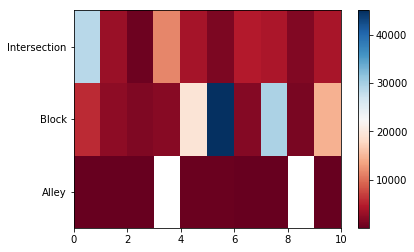

In [16]:
plt.pcolor(df2_pivot, cmap = 'RdBu')
plt.colorbar()
plt.yticks([0.5, 1.5, 2.5],['Alley','Block','Intersection'])
plt.show()

The pivot table and the heatmap confirm our previous hypothesis about parked car cotributing a significant proportion of accidents reported in blocks. It is followed by the 'angle collision at intersections', 'sideswipe collision in blocks' and 'left turn collision at intersections'. If these four issues could be addressed systematically, about 60% of the accidents can be avoided.

Now that we have explored the location of incident and type of collision, let us move on to environmental factors potentially affecting the accidents. We will specifically look at three factors for which we have data available in this dataset, namely weather, road condition and light condition.

In [17]:
df2['WEATHER'].value_counts()

Clear                       110493
Raining                      32969
Overcast                     27545
Unknown                      14057
Snowing                        896
Other                          790
Fog/Smog/Smoke                 563
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

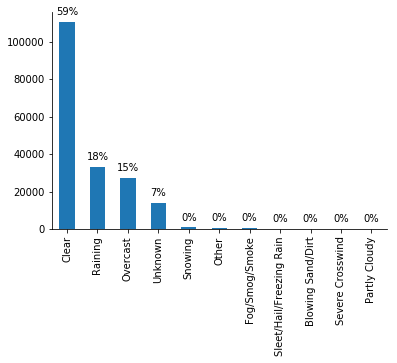

In [18]:
ax4 = df2['WEATHER'].value_counts().plot(kind='bar')
def add_value_labels(ax4, spacing=5, fontsize = 14):

    for rect in ax4.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        label = "{:.0%}".format(y_value/187504)
        ax4.annotate(label, (x_value, y_value), xytext = (0, spacing), textcoords = "offset points", ha = 'center', va='bottom')

add_value_labels(ax4)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)

This chart indicates that 59% of the accidents took place on clear days, 18% on rainy days and 15% on overcast days. Let us explore whether the weather had any significant effect on the severity of the accidents.

In [19]:
df2group2 = df2[['SEVERITYCODE','WEATHER','COLLISIONTYPE']].groupby(['WEATHER','SEVERITYCODE'],as_index= False).count()
df2pivot2 = df2group2.pivot(index='WEATHER', columns = 'SEVERITYCODE')
df2pivot2

COLLISIONTYPE       
SEVERITYCODE                         1      2
WEATHER                                      
Blowing Sand/Dirt                   36     13
Clear                            74775  35718
Fog/Smog/Smoke                     377    186
Other                              676    114
Overcast                         18834   8711
Partly Cloudy                        2      3
Raining                          21835  11134
Severe Crosswind                    18      7
Sleet/Hail/Freezing Rain            85     27
Snowing                            729    167
Unknown                          13267    790

On clear, rainy as well as overcast days, the ratio of severity 1 and severity 2 accidents appear to be similar indicating that the weather may not have significant effect on severity of the accidents.

In [20]:
df2['ROADCOND'].value_counts()

Dry               123730
Wet                47213
Unknown            14005
Ice                 1192
Snow/Slush           992
Other                124
Standing Water       111
Sand/Mud/Dirt         73
Oil                   64
Name: ROADCOND, dtype: int64

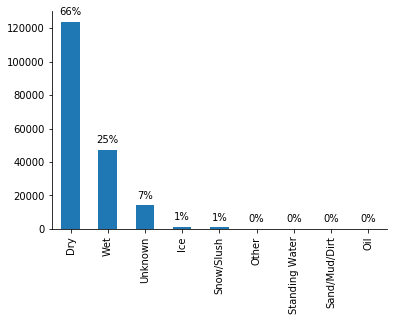

In [21]:
ax5 = df2['ROADCOND'].value_counts().plot(kind='bar')
def add_value_labels(ax5, spacing=5, fontsize = 14):

    for rect in ax5.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        label = "{:.0%}".format(y_value/187504)
        ax5.annotate(label, (x_value, y_value), xytext = (0, spacing), textcoords = "offset points", ha = 'center', va='bottom')

add_value_labels(ax5)
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)

In [22]:
df2group3 = df2[['SEVERITYCODE','ROADCOND','COLLISIONTYPE']].groupby(['ROADCOND','SEVERITYCODE'],as_index= False).count()
df2pivot3 = df2group3.pivot(index='ROADCOND', columns = 'SEVERITYCODE')
df2pivot3

COLLISIONTYPE       
SEVERITYCODE               1      2
ROADCOND                           
Dry                    83832  39898
Ice                      923    269
Oil                       40     24
Other                     82     42
Sand/Mud/Dirt             51     22
Snow/Slush               827    165
Standing Water            82     29
Unknown                13276    729
Wet                    31521  15692

The proportion of wet among severity 2 accidents is slightly higher than the proportion of wet among all accidents. This may indicate a role of wet roads in increasing the severity of the accident which can be further evaluated using machine learning models. 

In [23]:
df2['LIGHTCOND'].value_counts()

Daylight                    115395
Dark - Street Lights On      48233
Unknown                      12597
Dusk                          5842
Dawn                          2490
Dark - No Street Lights       1525
Dark - Street Lights Off      1184
Other                          227
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

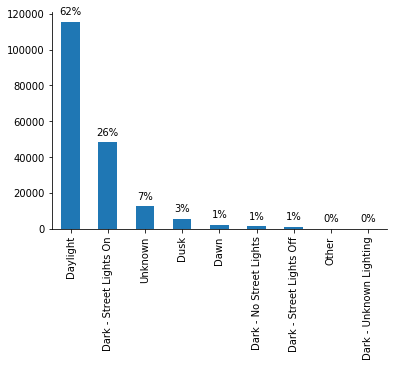

In [24]:
ax6 = df2['LIGHTCOND'].value_counts().plot(kind='bar')
def add_value_labels(ax6, spacing=5, fontsize = 14):

    for rect in ax6.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        label = "{:.0%}".format(y_value/187504)
        ax6.annotate(label, (x_value, y_value), xytext = (0, spacing), textcoords = "offset points", ha = 'center', va='bottom')

add_value_labels(ax6)
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)

Lights do not seem to be a problem as most of the accidents occurred in daylight or with street lights on. Let's see a breakdown of accident severity for various light conditions.

In [25]:
df2group4 = df2[['SEVERITYCODE','LIGHTCOND','COLLISIONTYPE']].groupby(['LIGHTCOND','SEVERITYCODE'],as_index= False).count()
df2pivot4 = df2group4.pivot(index='LIGHTCOND', columns = 'SEVERITYCODE')
df2pivot4

COLLISIONTYPE       
SEVERITYCODE                         1      2
LIGHTCOND                                    
Dark - No Street Lights           1191    334
Dark - Street Lights Off           869    315
Dark - Street Lights On          33816  14417
Dark - Unknown Lighting              7      4
Dawn                              1667    823
Daylight                         76995  38400
Dusk                              3906   1936
Other                              175     52
Unknown                          12008    589

The data does not point to any obvious relation between light condition and accident severity.

## Methodology

To explore the predictability of accident severity based on the selected explanatory variables, we will train a classifier model on the data.  
We will follow the following steps to arrive at a classifier model:  
1. First of all, we will create the dummy variables for the categorical variables.
2. Next, we will split the available dataset into training, cross-validation and test data sets. Training data will be used to train the models, cross validation data will be used to fine-tune the model by adjusting certain parameters, and the test data will be used to evaluate the performance of the models.
3. We will fit various classification models to the data and evaluate the accuracy for each.


## Results

### Data Pre-processing

In [26]:
# Getting the explanatory variables
df3 = df2.iloc[:,1:10]
# Getting the independent variable
y = df2['SEVERITYCODE'].values

# Creating dummy variables
df4 = pd.concat([df3,pd.get_dummies(df['ADDRTYPE'])], axis=1)
df4.drop(['ADDRTYPE','Alley'], axis = 1, inplace = True)
df5 = pd.concat([df4,pd.get_dummies(df['COLLISIONTYPE'])], axis=1)
df5.drop(['COLLISIONTYPE','Other'], axis = 1, inplace = True)
df6 = pd.concat([df5,pd.get_dummies(df['WEATHER'])], axis=1)
df6.drop(['WEATHER','Other'], axis = 1, inplace = True)
df7 = pd.concat([df6,pd.get_dummies(df['ROADCOND'])], axis=1)
df7.drop(['ROADCOND','Other'], axis = 1, inplace = True)
df8 = pd.concat([df7,pd.get_dummies(df['LIGHTCOND'])], axis=1)
df8.drop(['LIGHTCOND','Other','Unknown'], axis = 1, inplace = True)
df8.dropna(axis=0, inplace = True)

# Feature Scaling
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(df8).transform(df8)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:21: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.


In [27]:
# We will split the dataset in two steps: first carving out a 20% test set and then from the training set, carving out a 25% cross validation set
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
X_train, X_cv, y_train, y_cv = train_test_split( X_temp, y_temp, test_size=0.25, random_state=10)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Cross validation set:', X_cv.shape,  y_cv.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (112502, 38) (112502,)
Cross validation set: (37501, 38) (37501,)
Test set: (37501, 38) (37501,)


### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score, f1_score, log_loss

lr_acc = np.zeros(5)
C = [0.01, 0.03, 0.1, 0.3, 1]
for n in range(1,6):
    c = C[n-1]
    LR = lr(C= c, solver='liblinear').fit(X_train,y_train)
    yhat = LR.predict(X_cv)
    yhat_prob = LR.predict_proba(X_cv)
    lr_acc[n-1] = metrics.accuracy_score(y_cv, yhat)

lr_acc

array([0.7549932 , 0.75496653, 0.75509986, 0.75512653, 0.7550732 ])

Although the accuracy is not affected significantly by changing C, the best accuracy was at c=0.3. So, let's use that model.

In [29]:
LR3 = lr(C = 0.3, solver = 'liblinear').fit(X_train, y_train)

We will evaluate the accuracy of the model using the test data on 3 parameters: Jaccard Similarity Score, F1 score and log loss score.

In [31]:
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
f1sl = f1_score(y_test, yhat, average='weighted') 
jssl = jaccard_similarity_score(y_test, yhat)
logloss = log_loss(y_test, yhat_prob)
print("The F1 score is ", f1sl, ", the Jaccard Similarity Score is ", jssl, " and the log loss score is ", logloss)

The F1 score is  0.717796436024343 , the Jaccard Similarity Score is  0.7573398042718861  and the log loss score is  0.4811901425339784


This indicates that the model has performed reasonably well in predicting the severity of the accidents based on the variables selected.

## Discussion

Let's print the predictor variables and the coefficients of this model.

In [30]:
X_var = df8.columns.tolist()
coeff = LR3.coef_.tolist()
dfcoef= pd.DataFrame(coeff)
dfcoeff = dfcoef.transpose()
dfcoeff.rename(columns = {0:'Coefficient'}, inplace = True)
dfvar = pd.DataFrame(X_var)
dfvar.rename(columns = {0:'Predictors'}, inplace = True)
RegResult = pd.concat([dfvar,dfcoeff], axis =1)
print("The regression results are in the table below:")
print(RegResult)

The regression results are in the table below:
                  Predictors  Coefficient
0                PERSONCOUNT     0.196347
1                   PEDCOUNT     0.503117
2                PEDCYLCOUNT     0.557418
3                   VEHCOUNT     0.177225
4                      Block     0.384537
5               Intersection     0.464946
6                     Angles     0.069204
7                     Cycles    -0.034651
8                    Head On     0.049831
9                  Left Turn     0.044486
10                Parked Car    -0.807155
11                Pedestrian     0.139716
12                Rear Ended     0.153727
13                Right Turn    -0.084374
14                 Sideswipe    -0.337537
15         Blowing Sand/Dirt     0.002608
16                     Clear     0.172218
17            Fog/Smog/Smoke     0.017697
18                  Overcast     0.105056
19             Partly Cloudy     0.014706
20                   Raining     0.104690
21          Severe Crosswind 

It is worth noting that the model considers severity 1 as '0' and severity 2 as '1' case. So, the variables with positive coefficients are more likely to be correlated to severity 2 accidents whereas the variables with negative coefficients are likely correlated to severity 1 accidents.  
It follows from the table above that 'Parked car accidents' and 'Sideswipe accidents' have strong correlation with severity 1 accidents. This confirms our hypothesis based on exploratory data analysis.  
The count of persons, pedestrians, cycles, and vehicles involved in accidents are all positively correlated with the severity 2 accidents i.e. more the number of persons or vehicles involved in the accident, more are the chances of it being a severity 2 accident. However, the number of persons and number of vehicles have much lower coefficient than number of pedestrians and number of cycles. So, the accidents involving pedestrians and cyclists are more likely to be severity 2 accident than the accidents involving vehicles.  
'Overcast' and 'raining' weather conditions have positive coeffiecients indicating they contribute to severity 2 accidents. Positive coefficient for 'wet' road condition further validates this point.  
Among light conditions, 'Daylight' and 'Street Lights on' have highest positive coefficients, indicating that bad light had no significant impact in increasing the severity of the accident.